# Analysis Hotel Booking Cancellation

## Description

1. The hotel booking dataset that comes from this link :- https://www.kaggle.com/jessemostipak/hotel-booking-demand/download


2. In this data set two different types of hotels are included one is <font color=green>City hotel </font> and another one is <font color=green>Resort Hotel.</font>


3. Both datasets share the same structure, with <font color=green>31 variables</font> describing the <font color=green>79,330</font> observations of City hotel and <font color=green>40,060</font> observations of Resort hotel. 


4. This data between the 1st of July of 2015 and the 31st of August 2017".


5. The **purpose of this project** is to analysis the hotel booking cancellation rate among the City hotel and Resort Hotel. 



In [1]:
import numpy as np #working with arrays
import pandas as pd #to deal with data analysis and manipulation
import seaborn as sns #interface for drawing attractive and informative statistical graphics
import os
import matplotlib.pyplot as plt
import plotly.express as px #that exposes a simple syntax for complex charts.
import plotly 
import sys
import matplotlib #creating static, animated, and interactive visualizations in Python.
import scipy #library for mathematics, science solution
import IPython # interactive python 
from scipy.stats import norm
from IPython.display import display



print('Python : {}'.format(sys.version[0:5]))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Seaborns : {}'.format(sns.__version__))
print('Plotly : {}'.format(plotly.__version__))
print('Scipy : {}'.format(scipy.__version__))
print('IPython : {}'.format(IPython.__version__))


Python : 3.7.4
Numpy : 1.16.5
Pandas : 0.25.1
Matplotlib : 3.1.1
Seaborns : 0.9.0
Plotly : 4.8.1
Scipy : 1.4.1
IPython : 7.8.0


### Load the data

In [2]:
df = pd.read_csv(r'D:\hotel_bookings.csv')
#pd.set_option('display.max_columns', None)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

These are the first 5 observations.

In [3]:
# find no of rows and columns in the Dataset
nrow,ncol=df.shape
print(f"There are {nrow} rows and {ncol} columns in the Dataset")

There are 119390 rows and 32 columns in the Dataset


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

 let's look at what columns we have available..

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [6]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Let's take a look at the variable descriptions:

|Variable|	Type	|scale	|Description|
| --- | --- | --- | --- |
|Hotel	|Qualitative, Discrete (object)|	Nominal|	Types of hotel|
|is_canceled	|Qualitative, Discrete (int64)|	Nominal|	Value indicating if the booking was canceled (1) or not (0)|
|lead_time	|Quantitative, Discrete (int64)|	Nominal|	Number of days that elapsed betweenthe entering date of the booking into the PMS and the arrival date|
|arrival_date_year 	|Quantitative, Discrete (int64)|	Ordinal|	Year of arrival date |
|arrival_date_month |Quantitative, Discrete (object)|	Ordinal|	 Month of arrival date with 12 categories: January to December |
|arrival_date_week_number |Quantitative, Discrete (int64)|	Ordinal|Week number of the arrival date|
|arrival_date_day_of_month |Quantitative, Discrete (int64)|	Ordinal|	Day of the month of the arrival date|
| stays_in_weekend_nights |QuantitativeOrdinal, Discrete (int64)|	Nominal|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights   |Quantitative, Discrete (int64)|	Nominal|	Number of week nights (Monday to Fri-day) the guest stayed or booked to stay at the hotel|
|adults	|Quantitative, Discrete (int64)|	Nominal|	Number of adults|
|children 	|Quantitative, Discrete (float64)|	Nominal|	Number of children|
|babies    	|Quantitative, Discrete (int64)|	Nominal|	 Number of Babies|
| meal  	|Qualitative, Discrete (object)|	Nominal|	Type of meal booked|
|country 	|Qualitative, Discrete (object)|	Nominal|	Country of origin. Categories are represented in the ISO 3155–3:2013 format|
|market_segment  	|Qualitative, Discrete (object)|	Nominal|	Market segment designation`TA` means TravelAgents and `TO` means TourOperators |
|distribution_channel     	|Qualitative, Discrete (object)|	Nominal|	 Booking distribution channel`TA` means TravelAgents and `TO` means Tour Operators |
|is_repeated_guest |Qualitative, Discrete (int64)|	Nominal|Value indicating if the booking namewas from a repeated guest (`1`) or not (`0`)|
|previous_cancellations  |Quantitative , Discrete (int64)|	Nominal|	 Number of previous bookings that werecancelled by the customer prior to the current booking|
|previous_bookings_not_canceled    |Quantitative , Discrete (int64)|	Nominal|	 N Number of previous bookings notcancelled by the customer prior to thecurrent booking |
|reserved_room_type	|Qualitative, Discrete (object)|	Nominal|Code of room type reserved. Code ispresented instead of designation for anonymity reasons|
|assigned_room_type	|Qualitative, Discrete (object)|	Nominal|Code for the type of room assigned to the booking. Sometimes the assigned roomtype differs from the reserved room typedue to hotel operation reasons (e.g.overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.|
|booking_changes	|Quantitative, Discrete (int64)|	Nominal|Number of changes/amendments madeto the booking from the moment thebooking was entered on the PMS untilthe moment of check-in or cancellation |
|deposit_type	|Qualitative, Discrete (object)|	Nominal|-------------|
|agent	|Qualitative, Discrete (float64)|	Nominal| ID of the travel agency that made thebooking|
|company	|Qualitative, Discrete (float64)|	Nominal|ID of the company/entity that made thebooking or responsible for paying thebooking. ID is presented instead of des-ignation for anonymity reasons|
|days_in_waiting_list	|Quantitative, Discrete (int64)|	Nominal|Number of days the booking was in thewaiting list before it was confirmed to the customer |
|customer_type	|Qualitative, Discrete (object)|	Nominal|Type of booking|
|adr	|Quantitative, Discrete (float64)|	Nominal| Average Daily Rate - Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces 	|Quantitative, Discrete (int64)|	Nominal| Number of car parking spaces requiredby the customer|
|total_of_special_requests 	|Quantitative, Discrete (int64)|	Nominal|Number of special requests made by thecustomer|
|reservation_status	|Qualitative, Discrete (object)|	Nominal|Reservation last status|
|reservation_status_date	|Quantitative, Discrete (object)|	Ordinal|Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or whendid the customer checked-out of the hotel|






Various features are define below:

- **CustomerType -** 
    * Contract - when the booking has an allotment or other type of contract associated to it;
    * Group - when the booking is associated to a group;
    * Transient - when the booking is not part of a group or contract,and is not associated to other transient booking
    * Transient-party - when the booking is transient, but is associated to at least other transient booking
- **DepositType -**
    * No Deposit – no deposit was made;
    * Non Refund – a deposit was made in the value of the total stay cost;
    * Refundable – a deposit was made with a value under the total cost of stay.
- **Meal -**
    * Undefined/SC – no meal package;
    * BB – Bed & Breakfast;
    * HB – Half board (breakfast and one other meal – usually dinner);
    * FB – Full board (breakfast, lunch and dinner 
- **ReservationStatus -**
    * Canceled – booking was canceled by the customer;
    * Check-Out – customer has checked in but already departed;
    * No-Show – customer did not check-in and did inform the hotel of the reason why


Let's see if that matches the data we have..

In [39]:
t = pd.DataFrame([[i,df[i].dtype,df[i].unique()] for i in df.columns])
t.columns = ['name','dtype','unique']
t   

name    dtype  \
0                            hotel   object   
1                      is_canceled    int64   
2                        lead_time    int64   
3                arrival_date_year    int64   
4               arrival_date_month   object   
5         arrival_date_week_number    int64   
6        arrival_date_day_of_month    int64   
7          stays_in_weekend_nights    int64   
8             stays_in_week_nights    int64   
9                           adults    int64   
10                        children  float64   
11                          babies    int64   
12                            meal   object   
13                         country   object   
14                  market_segment   object   
15            distribution_channel   object   
16               is_repeated_guest    int64   
17          previous_cancellations    int64   
18  previous_bookings_not_canceled    int64   
19              reserved_room_type   object   
20              assigned_room_type   object   
21                 booking_changes    int64   
22                    deposit_type   object   
23                           agent  float64   
24                         company  float64   
25            days_in_waiting_list    int64   
26                   customer_type   object   
27                             adr  float64   
28     required_car_parking_spaces    int64   
29       total_of_special_requests    int64   
30              reservation_status   object   
31         reservation_status_date   object   

                                               unique  
0                          [Resort Hotel, City Hotel]  
1                                              [0, 1]  
2   [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...  
3                                  [2015, 2016, 2017]  
4   [July, August, September, October, November, D...  
5   [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...  
6   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
7   [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...  
8   [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...  
9   [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]  
10                    [0.0, 1.0, 2.0, 10.0, 3.0, nan]  
11                                   [0, 1, 2, 10, 9]  
12                        [BB, FB, HB, SC, Undefined]  
13  [PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...  
14  [Direct, Corporate, Online TA, Offline TA/TO, ...  
15         [Direct, Corporate, TA/TO, Undefined, GDS]  
16                                             [0, 1]  
17  [0, 1, 2, 3, 26, 25, 14, 4, 24, 19, 5, 21, 6, ...  
18  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
19                     [C, A, D, E, G, F, H, L, P, B]  
20               [C, A, D, E, G, F, I, B, H, P, L, K]  
21  [3, 4, 0, 1, 2, 5, 17, 6, 8, 7, 10, 16, 9, 13,...  
22               [No Deposit, Refundable, Non Refund]  
23  [nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2...  
24  [nan, 110.0, 113.0, 270.0, 178.0, 240.0, 154.0...  
25  [0, 50, 47, 65, 122, 75, 101, 150, 125, 14, 60...  
26      [Transient, Contract, Transient-Party, Group]  
27  [0.0, 75.0, 98.0, 107.0, 103.0, 82.0, 105.5, 1...  
28                                    [0, 1, 2, 8, 3]  
29                                 [0, 1, 3, 2, 4, 5]  
30                     [Check-Out, Canceled, No-Show]  
31  [01-07-2015, 02-07-2015, 03-07-2015, 06-05-201...

In [8]:
# dataset summary statistics – Integer and numeric variables.
# T means Transpose

df.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [9]:
#dataset summary statistics – Categorical variables.
# T means Transpose

df.describe(include='O').T

count unique         top    freq
hotel                    119390      2  City Hotel   79330
arrival_date_month       119390     12      August   13877
meal                     119390      5          BB   92310
country                  118902    177         PRT   48590
market_segment           119390      8   Online TA   56477
distribution_channel     119390      5       TA/TO   97870
reserved_room_type       119390     10           A   85994
assigned_room_type       119390     12           A   74053
deposit_type             119390      3  No Deposit  104641
customer_type            119390      4   Transient   89613
reservation_status       119390      3   Check-Out   75166
reservation_status_date  119390    926  21-10-2015    1461

### Missing Value

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Looks like there is data missing for `country`, `agent`, `childern` and `company`**

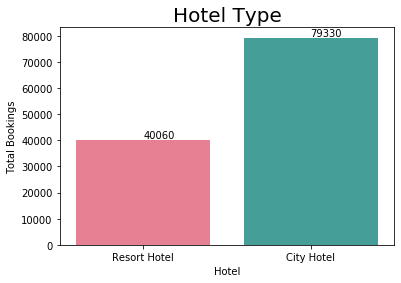

In [11]:
#Hotel Types

#plt.figure(figsize=(12,8))
ax = sns.countplot(x="hotel", data = df,palette="husl")
plt.title('Hotel Type', fontsize=20)
plt.xlabel('Hotel')
plt.ylabel('Total Bookings')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+700)) 

The booking ratio between Resort Hotel and City Hotel.



### EDA

#### 1. Which hotel has more cancelations?

In [12]:
print('There are ' + str(len(df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)])) + ' cancelations at Resort Hotel')
print('There are ' + str(len(df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)])) + ' cancelations at City Hotel')

There are 11122 cancelations at Resort Hotel
There are 33102 cancelations at City Hotel


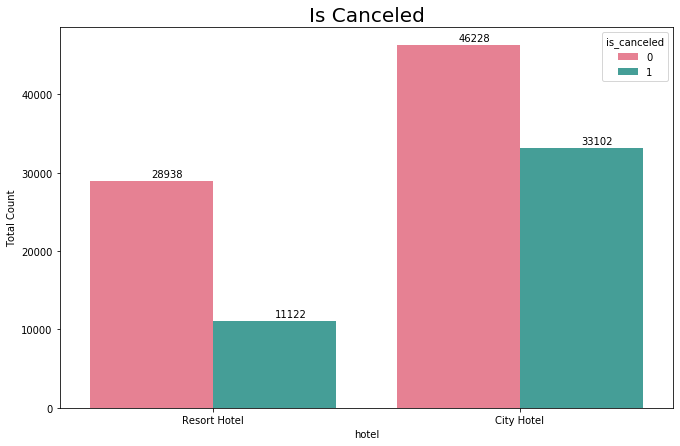

In [13]:
#Which hotel has more cancelations?
#Value indicating if the booking was canceled (1) or not (0)

plt.figure(figsize=(11,7))
ax = sns.countplot(x="hotel",hue ="is_canceled",  data = df,palette="husl")
plt.title('Is Canceled', fontsize=20)
plt.xlabel('hotel')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.2, p.get_height()+500)) 

City Hotel has a higher cancellations rate of 41.73% comparing to Resort Hotel’s 27.98%


In [14]:
df1 = df.copy()
df1['is_canceled'] = df1['is_canceled'].replace({0: "No", 1: "Yes"})
df1.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          No        342               2015               July   
1  Resort Hotel          No        737               2015               July   
2  Resort Hotel          No          7               2015               July   
3  Resort Hotel          No         13               2015               July   
4  Resort Hotel          No         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

In [15]:
pd.set_option('precision', 2)


In [16]:
df_cross = pd.crosstab(df1.is_canceled, df1.hotel, normalize=True, margins=True)
df_cross

hotel        City Hotel  Resort Hotel   All
is_canceled                                
No                 0.39          0.24  0.63
Yes                0.28          0.09  0.37
All                0.66          0.34  1.00

# Hypothesis Testing

## One Population Proportion

 - **Hypothesis 1:** Can we believe that 10% booking cancellation is made in Resort Hotel?   
 - **Hypothesis 2:** The proportion of booking cancellation in City Hotel is 30%

 - **Hypothesis 3:** The booking cancellation rate for both types of hotel is more than 35%.

**Hypothesis 1:** Can we believe that 10% booking cancellation is made in Resort Hotel? 

**Null Hypotheis:** $(H_0): p = 0.10$

**Alternate Hypotheis:** $(H_a): p \ne 0.10$

**Level of significance: $\alpha = 0.05$**

**Formula:**

\begin{equation}
z=\frac{\widehat{p}-p}{SE};\quad \quad SE=\sqrt{\frac{p\left( 1-p \right)}{n}}
\end{equation}


In [17]:
# hypothesised value
p_null = 0.10 # (Based on null hypothesis)

# sample size
n = len(df1)

# level of significance
alpha = 0.05

# sample proportion
# p_hat = len(df1.loc[(df1.hotel.isin(['Resort Hotel'])) & (df1.is_canceled == "Yes")])/n
p_hat = df_cross['Resort Hotel'].Yes

# Standard Error
se = np.sqrt(p_null * (1 - p_null) / n)

# Test statistic
z_cal = (p_hat - p_null) / se

z_tab = norm.ppf(1-alpha/2)

display(pd.DataFrame([{"z_cal": z_cal, "z_tab": z_tab}]))


z_cal  z_tab
0  -7.88   1.96

**Conclusion:** 

Since the calculated z-value of the z-test is high, we can reject the Null hypothesis that the percentage of cancellations in Resort hotel is 10%. 

**Hypothesis 2:** The proportion of booking cancellation in City Hotel is 30%

**Null Hypotheis:** $(H_0): p = 0.30$

**Alternate Hypotheis:** $(H_a): p \ne 0.30$

**Level of significance: $\alpha = 0.05$**

**Formula:**

\begin{equation}
z=\frac{\widehat{p}-p}{SE};\quad \quad SE=\sqrt{\frac{p\left( 1-p \right)}{n}}
\end{equation}


In [18]:
# hypothesised value
p_null = 0.30 # (Based on null hypothesis)

# sample size
n = len(df1)

# level of significance
alpha = 0.05

# sample proportion
#p_hat = len(df1.loc[(df1.hotel.isin(['City Hotel'])) & (df1.is_canceled == "Yes")])/n
p_hat = df_cross['City Hotel'].Yes

# Standard Error
se = np.sqrt(p_null * (1 - p_null) / n)

# Test statistic
z_cal = (p_hat - p_null) / se

z_tab = norm.ppf(1-alpha/2)

display(pd.DataFrame([{"z_cal": z_cal, "z_tab": z_tab}]))


z_cal  z_tab
0 -17.15   1.96

**Conclusion:** 

Since the calculated z-value of the z-test is high, we can reject the Null hypothesis that the percentage of cancellations in City hotel is 30%. 

**Hypothesis 3:** The booking cancellation rate for both types of hotel is more than 35%.

**Null Hypotheis:** $(H_0): p \le 0.35$

**Alternate Hypotheis:** $(H_a): p > 0.35$

**Level of significance: $\alpha = 0.05$**

**Formula:**

\begin{equation}
z=\frac{\widehat{p}-p}{SE};\quad \quad SE=\sqrt{\frac{p\left( 1-p \right)}{n}}
\end{equation}


In [19]:
# hypothesised value
p_null = 0.35 # (Based on null hypothesis)

# sample size
n = len(df1)

# level of significance
alpha = 0.05

# sample proportion (city_hotel and Resort hotel)
p_hat= df_cross['All'].Yes

# Standard Error
se = np.sqrt(p_null * (1 - p_null) / n)

# Test statistic
z_cal = (p_hat - p_null) / se

z_tab = norm.ppf(1-alpha/2)


display(pd.DataFrame([{"z_cal": z_cal, "z_tab": z_tab}]))





z_cal  z_tab
0  14.79   1.96

**Conclusion:** 

Since the calculated z-value of the z-test is high, we can reject the Null hypothesis that the percentage of cancellation rate for both types of hotel is more than 35%.

## Hypothesis Tests for Two Proportions

- Comparative tests are conducted much more frequently than one population proportion hypothesis test. 

- A two-sample test of proportions is performed to assess if the population proportion of some traits differs between two subgroups. 

- Here, we are going to test if the population proportion of City hotels with cancellations is different from the population proportion of Resort hotels with cancellations.

**Null Hypotheis:** $(H_0): p_1 - p_2 = 0$

**Alternate Hypotheis:** $(H_a): p_1 - p_2 \ne 0$

 - Here $p_1$ is proportion of City Hotel and $p_2$ is proportion of Resort Hotel.

**Level of significance: $\alpha = 0.05$**

**Formula:**

\begin{equation}
z=\frac{p_1-p_2}{SE};
\end{equation}

The standard error for two population proportion is calculated with the formula below:

\begin{equation}
SE=\sqrt{p\left( 1-p \right)\left( \frac{1}{{{n}_{1}}}+\frac{1}{{{n}_{2}}} \right)} 
\end{equation}

where, $p$ is the total population proportion in the sample with cancellations.

$n_1$ and $n_2$ are the total numbers of the city hotel and resort hotel in the sample.

In [20]:
df_cross1 = pd.crosstab(df1.is_canceled, df1.hotel, margins=True)
df_cross1

hotel        City Hotel  Resort Hotel     All
is_canceled                                  
No                46228         28938   75166
Yes               33102         11122   44224
All               79330         40060  119390

In [21]:
# Total cancellation proportion
p_null = df_cross['All'].Yes  

# sample size
n1 = df_cross1['City Hotel'].All
n2 = df_cross1['Resort Hotel'].All

# level of significance
alpha = 0.05

# sample proportion
p1 = df_cross['City Hotel'].Yes
p2 = df_cross['Resort Hotel'].Yes

# Standard Error
se = np.sqrt(p_null * (1 - p_null) / (1/n1 + 1/n2))

# Test statistic
z_cal = (p1 - p2) / se

z_tab = norm.ppf(1-alpha/2)

display(pd.DataFrame([{"z_cal": z_cal, "z_tab": z_tab}]))


z_cal  z_tab
0  2.34e-03   1.96

**Conclusion:** 

- Since the calculated z-value of the z-test is pretty small, we do not have enough evidence to reject the null hypothesis. 

- The population proportion of city hotel with cancellations is not significantly different than the population proportion of resort hotel with cancellations.

#### 2. Any difference in lead time?

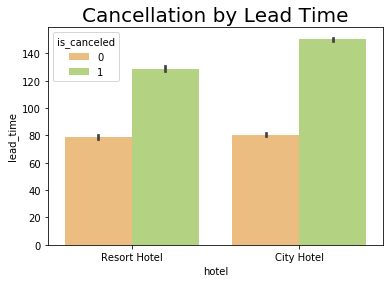

In [22]:
#Lead time

sns.barplot(x="hotel",y="lead_time",hue="is_canceled", data = df, palette="RdYlGn")
plt.title('Cancellation by Lead Time',fontsize=20)
plt.xlabel('hotel')
plt.ylabel('lead_time')
plt.show()

Looks like the longer the lead time, the reservation is more likely to be canceled.

#### 3. How about ADR?

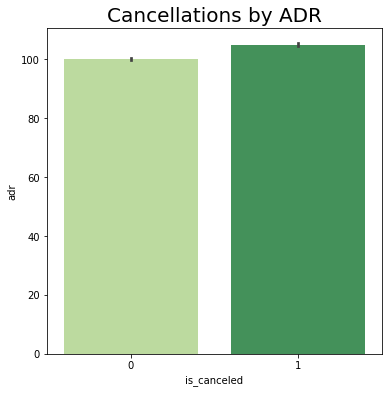

In [23]:
#How about adr?

plt.figure(figsize=(6,6))
ax = sns.barplot(x="is_canceled",y="adr",  data = df,palette="YlGn")
plt.title('Cancellations by ADR',fontsize=20)
plt.xlabel('is_canceled')
plt.ylabel('adr')
plt.show()

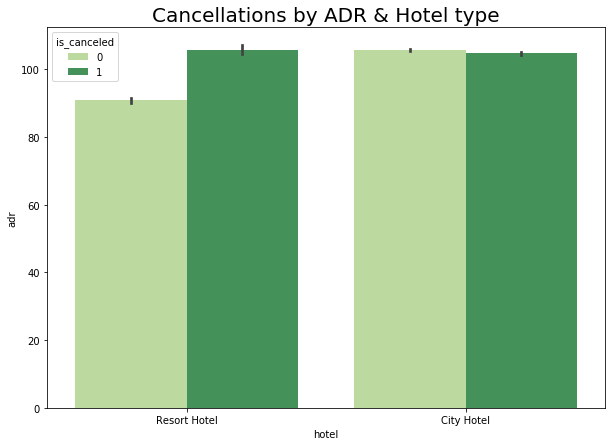

In [24]:
#Cancellation by ADR and Hotel Types

plt.figure(figsize=(10,7))
ax = sns.barplot(x="hotel",y="adr",hue="is_canceled",  data = df,palette="YlGn")
plt.title('Cancellations by ADR & Hotel type',fontsize=20)
plt.xlabel('hotel')
plt.ylabel('adr')
plt.show()

Looks like the cancellations in Resort Hotels had a higher ADR.

#### 4. Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.

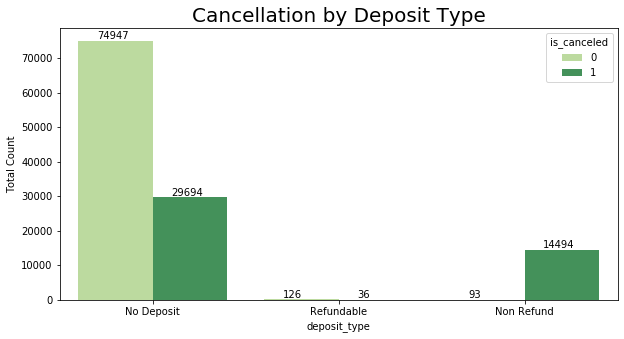

In [25]:
#deposit types 

plt.figure(figsize=(10,5))
ax = sns.countplot(x="deposit_type",hue ="is_canceled",  data = df,palette="YlGn")
plt.title('Cancellation by Deposit Type',fontsize=20)
plt.xlabel('deposit_type')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+500)) 

Reservations with No-deposit or Non-refund policy are more likely to be canceled

#### 5. Where do the guests come from?

In [26]:
#Where do the guests come from?

# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

Most of the guests belonged to Portugal, which indicates that probably this dataset belongs to some hotel in Portugal.


#### 6. Which type of meal have the highest number of booking?

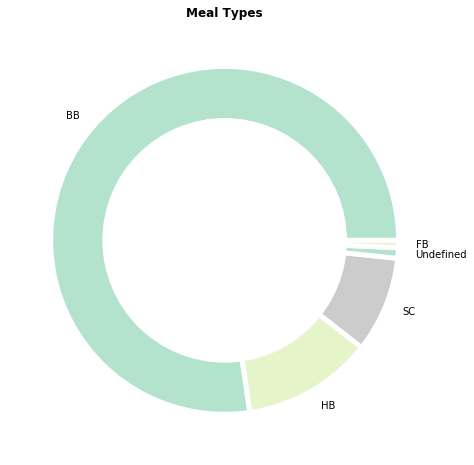

In [27]:
# `Meal` feature donut chart

meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df['meal'].value_counts()
plt.figure(figsize=(12,8))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

Above the donut pie graph shows the meal categories. There is a big difference in the `Bed&Breakfast` category and the others. Almost 80% of bookings reserved for `Bed&Breakfast`.

#### 7.Any difference in market segments?

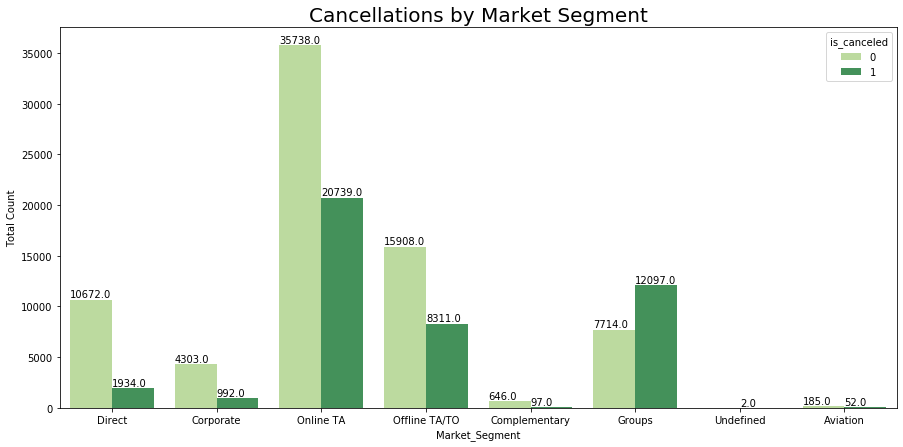

In [28]:
#Cancellation by Market Segment

plt.figure(figsize=(15,7))
ax = sns.countplot(x="market_segment",hue="is_canceled" , data = df,palette="YlGn")
plt.title('Cancellations by Market Segment',fontsize=20)
plt.xlabel('Market_Segment')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+200)) 

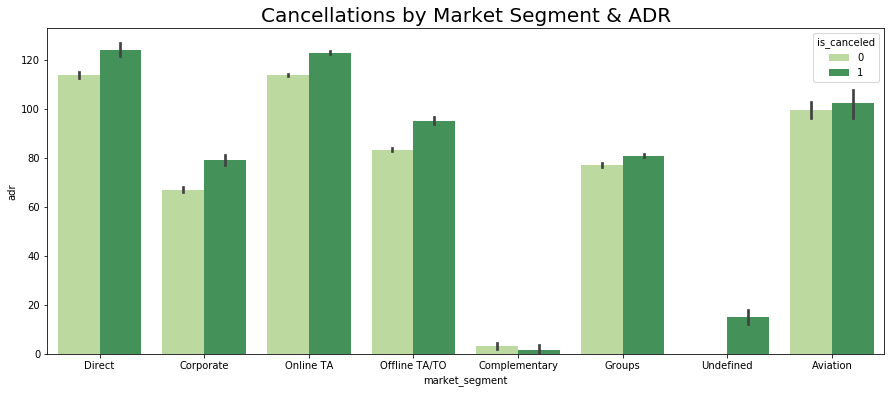

In [29]:
#Cancellation by Market Segment & adr 

plt.figure(figsize=(15,6))
ax = sns.barplot(x="market_segment",y="adr",hue="is_canceled",  data = df,palette="YlGn")
plt.title('Cancellations by Market Segment & ADR',fontsize=20)
plt.xlabel('market_segment')
plt.ylabel('adr')
plt.show()

* The cancellation percentage of Online TA is higher than other segments
* The cancellation number of Online TA is higher than other segments
* Almost all canceled reservations have a higher ADR.

##### Distribution Channel

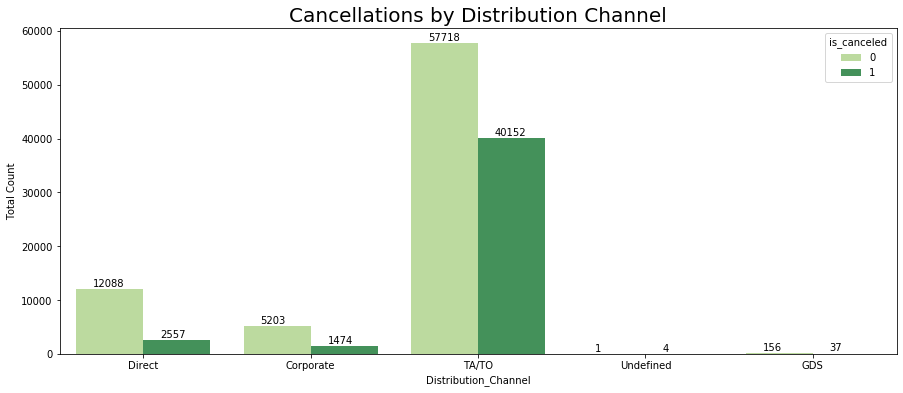

In [30]:
#Distribution Channel

plt.figure(figsize=(15,6))
ax = sns.countplot(x="distribution_channel",hue="is_canceled" , data = df,palette="YlGn")
plt.title('Cancellations by Distribution Channel',fontsize=20)
plt.xlabel('Distribution_Channel')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+500)) 

Reservations from Travel Agents or Tour Operators are more likely to be canceled



#### 8. Does guest come back?

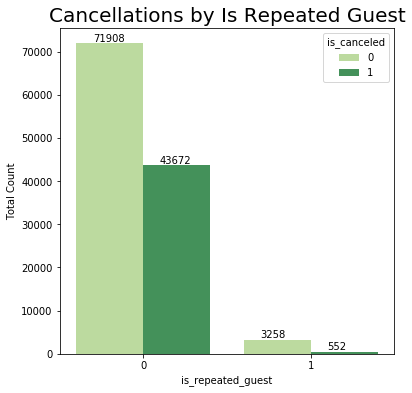

In [31]:
#Guest repeat or not..

plt.figure(figsize=(6,6))
ax = sns.countplot(x="is_repeated_guest",hue="is_canceled" , data = df,palette="YlGn")
plt.title('Cancellations by Is Repeated Guest',fontsize=20)
plt.xlabel('is_repeated_guest')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+500)) 

The above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (14%).

#### 9. If room assigned is not the same as reserved room type, customer might positively cancel the booking.

In [32]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.62
1     5.38
Name: is_canceled, dtype: float64

There more cancellations when assigned room type is different from reserved room type is not valid. There are only 5% cancellations in such a case.

##### Futher Analysis

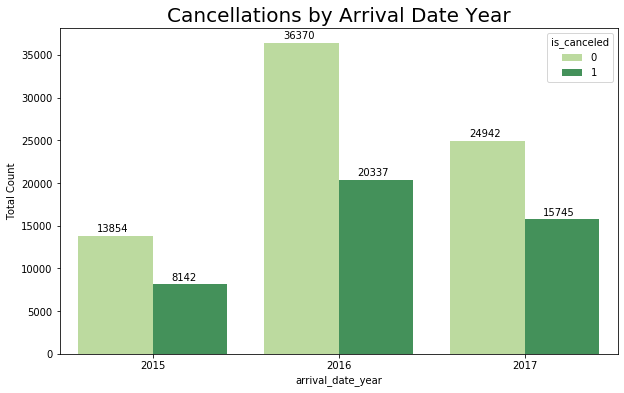

In [33]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="arrival_date_year",hue="is_canceled" , data = df,palette="YlGn")
plt.title('Cancellations by Arrival Date Year',fontsize=20)
plt.xlabel('arrival_date_year')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+500)) 

<Figure size 1080x504 with 0 Axes>

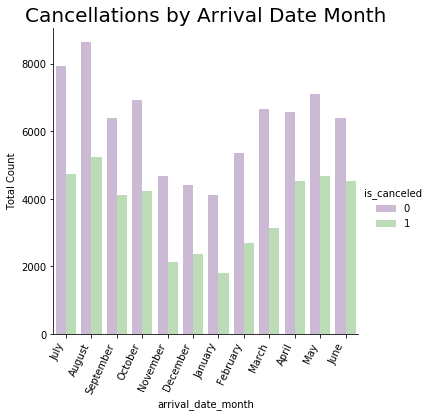

In [34]:
plt.figure(figsize=(15,7))
ax = sns.catplot(x="arrival_date_month",hue="is_canceled" , kind = "count",data = df,palette="PRGn")
plt.title('Cancellations by Arrival Date Month',fontsize=20)
ax.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel('arrival_date_month')
plt.ylabel('Total Count')
plt.show()

Maximum bookings occur in 2016 in the months of July and August.

Transient          75.06
Transient-Party    21.04
Contract            3.41
Group               0.48
Name: customer_type, dtype: float64


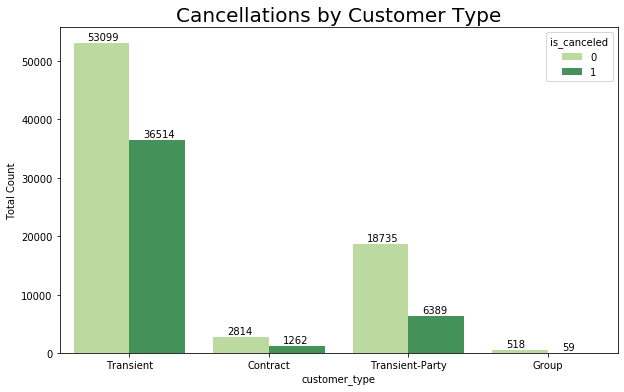

In [35]:
#Customer Type

print(df['customer_type'].value_counts(normalize=True)*100)

plt.figure(figsize=(10,6))
ax = sns.countplot(x="customer_type",hue="is_canceled" , data = df,palette="YlGn")
plt.title('Cancellations by Customer Type',fontsize=20)
plt.xlabel('customer_type')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.1, p.get_height()+500)) 

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

## Correlation for numerical features

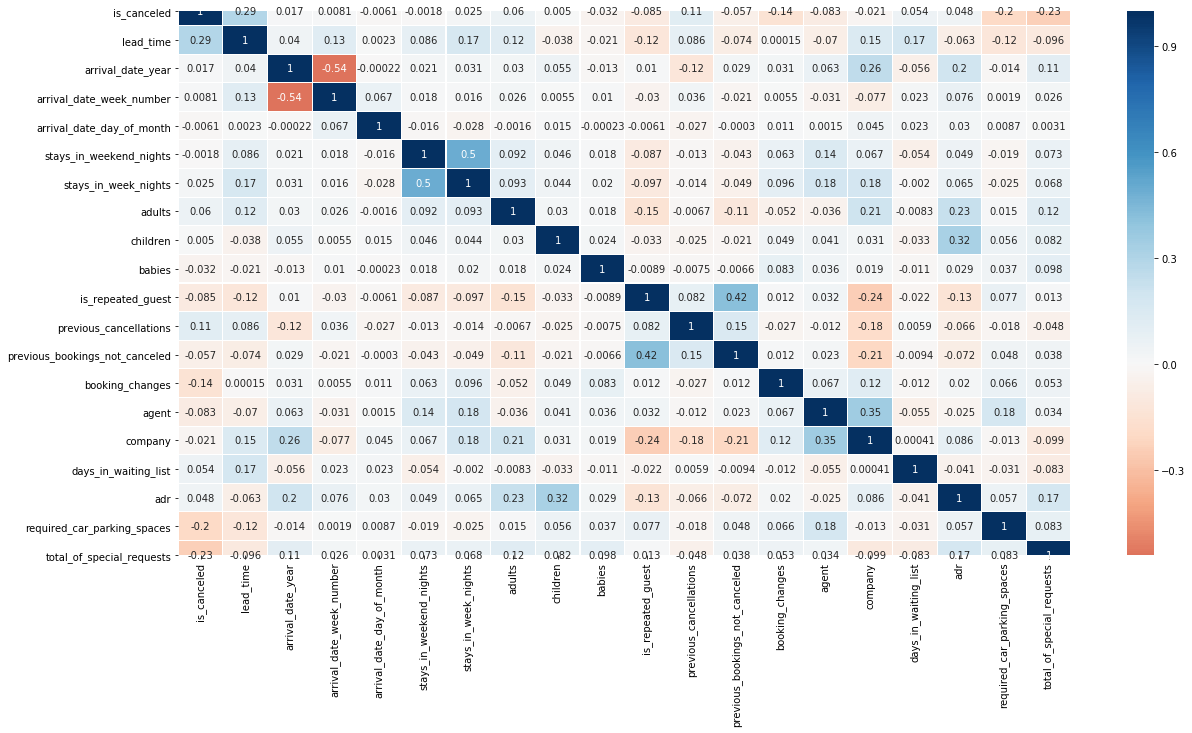

In [36]:
cor_mat = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor_mat, ax=ax, annot=True,cmap="RdBu", center=0, linewidths=0.1);

###### Our target variable `is_canceled` is positively correlated with:

* `lead_time:` bookings that are made well in advance are more likely to be canceled.
* `previous_cancellations:` bookings made by customers who have canceled bookings in the past are more likely to canceled.
* `adults:` single bookings tend to be canceled less frequently than bookings for larger parties..
* `days_in_waiting_list:` customers don't like to wait..
* `adr:` more expensive bookings tend to be canceled more often (a bit).

###### It is negatively correlated with:

* `is_repeat_guest:` repeat guests seem to be more loyal and don't cancel as much
* `booking_changes:` higher number of changes is associated with less cancelations
* `required_car_parking_spaces:` customers who come by car don't cancel as much (resort vs. city?)
* `total_of_special_requests:` bookings with higher number of special requests are canceled less often.

Let's have a closer look at the correlation with our target variable again:

In [37]:
corr = df.drop(columns = ['is_canceled']).corrwith(df['is_canceled'])
corr.name = 'is_canceled'
corr.to_frame().style.background_gradient(cmap='coolwarm')

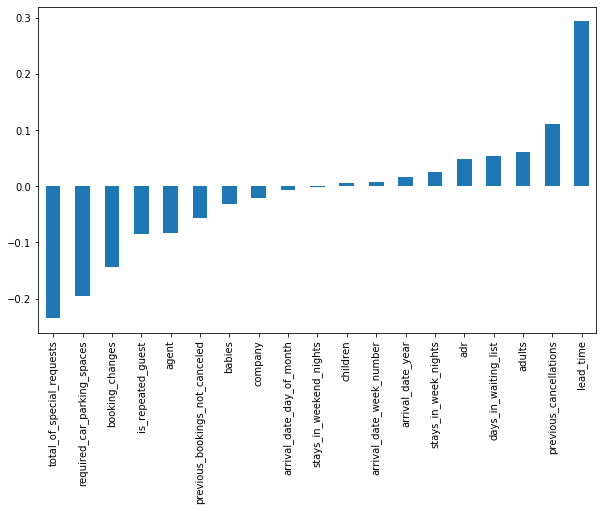

In [38]:
plt.figure(figsize=(10,6))
cancel_corr = df.corr()["is_canceled"]
cancel_corr.sort_values().head(20)[:-1].plot(kind='bar');
#cancel_corr.abs().sort_values(ascending=False)[1:]

We can more clearly see that both `lead_time` and `total_of_special_requests` had the strongest linear correlations with `is_canceled` target variable.

## Conclusions

- In conclusion,although the 2 of hotels are mainly using the same distribution channel which is TA/TO.
- Yet city hotel is the first picker by guests.
- But city hotel has higher canceled rate compare to check out rate. While Resort hotel has lower canceled rate compare to check out rate. 
- For demographic, the most of guests are come from Portugal (21071),United Kingdom(9676),Frances(8481),Spain (6391), and Germany (6069). Portugal's guests has high probability canceled their booking for city hotel and resort hotel. 
- Furthermore, the bigger proportion of guests are adults. It can said that most of guests are couple, man and wife or tour group. It has least family group guests as well.

- For marketing strategy,City hotel is doing well in customer ralationship management than resort hotel. Because they have a lot of loyalty customer compare to resort hotel.

- For meal package, the most of guests was like to pick the BB (Bed and Breakfast Package) whether is city hotel or resort hotel. The second meal package picker of city hotel is no meal package, while resort hotel is Half board (breakfast and one other meal – usually dinner). 
- Most of guests were like to have no car parking spaces whether is city hotel or resort hotel.It only has fewer guests need to have one car parking spaces.

- City hotel should put effort to solve the higher cancelation rate problem. While resort hotel should put effort on customer relation management to keep their guests loyaltly. 


## References

- www.sciencedirect.com
- https://www.kaggle.com/duygut/eda-booking-cancelation-prediction
- https://www.kaggle.com/tchen90/hotel-cancellatons-eda-prediction-86
- https://www.kaggle.com/ekagglisto/sdah-tutorial-part-2-cancellation-prediction
- https://www.kaggle.com/ekagglisto/sdah-hotel-bookings-tutorial-part-1-eda
- https://medium.com/analytics-vidhya/exploratory-data-analysis-of-the-hotel-booking-demand-with-python-200925230106
- https://medium.com/tech4she/investigating-factors-affecting-hotel-booking-cancelations-9ec9bf81b0a8
- https://www.kaggle.com/sanjana08/hotel-booking-cancellation-prediction